## Employee Prediction Analysis
Predicting HR Employee Analysis

### Loading Libraries


In [ ]:
#pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 2.5 MB/s 
     |████████████████████████████████| 22.3 MB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
     |████████████████████████████████| 837 kB 41.6 MB/s 
     |████████████████████████████████| 4.3 MB 26.3 MB/s 
     |████████████████████████████████| 4.4 MB 27.8 MB/s 
     |████████████████████████████████| 260 kB 43.8 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 141 kB 32.1 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.7-py3-none-any.whl size=6602873 sha256=9a3c61cbc244f2336fbcb18fa13f1682927dc985c6285425bab8abf5c202da60
  Stored in directory: /root/.cache/pip/wheels/ba/43/5c/2fbe6fd19e3af314cbc4aa808378068d8ddd6792064f4a2448
  Created wheel for pynisher: filename=pynisher-0.6.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import * 
import seaborn as sns

# importing scipy
from scipy.stats import chi2_contingency

### Loading the df Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hr.csv to hr.csv


In [ ]:
# Reading the df Dataset
df = pd.read_csv('hr.csv')

### Descriptive Analytics


In [ ]:
# first five rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Left Distribution
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
# last few rows
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
# dataset infor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Unique Values
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
department                10
salary                     3
dtype: int64

In [ ]:
# describe for summary stats
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# changing to categorical
df.Work_accident = df.Work_accident.astype('category')

In [ ]:
# changing to categorical
df.promotion_last_5years = df.promotion_last_5years.astype('category')

In [ ]:
# changing to categorical
df.left = df.left.astype('category')

In [ ]:
# Frequency
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
# HR info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  object  
 9   salary                 14999 non-null  object  
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 864.7+ KB


## Graphical Summaries

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


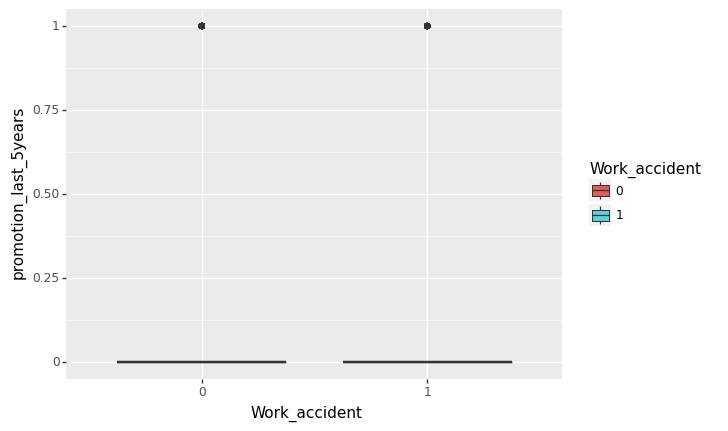

<ggplot: (8747383112053)>

In [ ]:
# Boxplot 
ggplot(df,aes(x = 'Work_accident', y = 'promotion_last_5years', fill = 'Work_accident' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


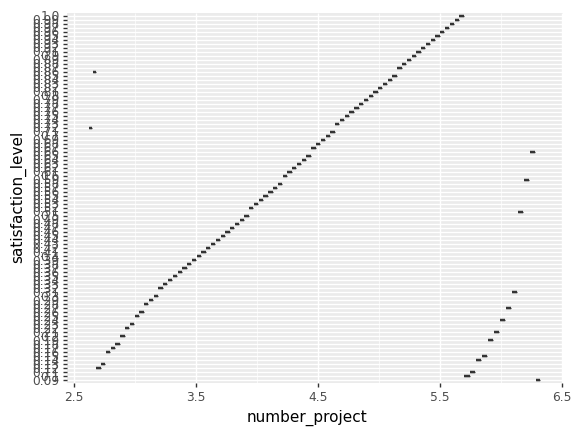

<ggplot: (8747380429433)>

In [ ]:
# Boxplot of number_project vs satisfaction_level
ggplot(df,aes(x = 'number_project', y = 'satisfaction_level', fill = 'number_project' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


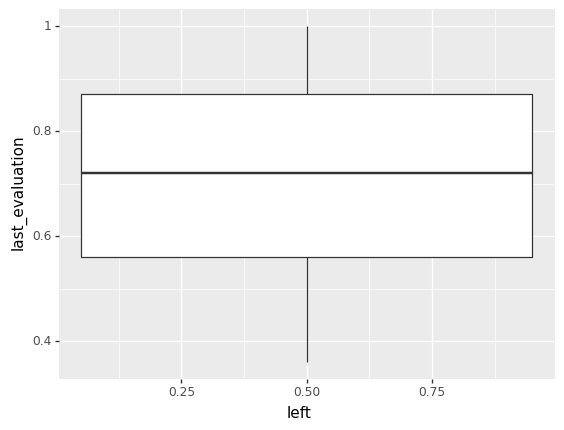

<ggplot: (8747379764781)>

In [ ]:
# Boxplot of last_evaluation and left
ggplot(df,aes(x = 'left', y = 'last_evaluation', fill = 'left' )) + geom_boxplot()

In [ ]:
# correlation matrix
df.corr()

,last_evaluation,number_project,left,promotion_last_5years
last_evaluation,1.000000,0.349333,0.006567,-0.008684
number_project,0.349333,1.000000,0.023787,-0.006064
left,0.006567,0.023787,1.000000,-0.061788
promotion_last_5years,-0.008684,-0.006064,-0.061788,1.000000


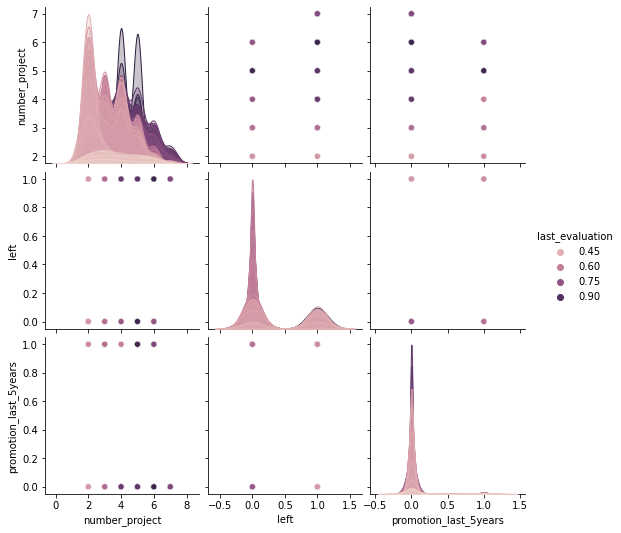

In [ ]:
# scatterplot matrix
sns.pairplot(df, diag_kind= 'kde', hue = 'last_evaluation')

In [ ]:
# chi Square test
for col in ['Work_accident', 'department', 'promotion_last_5years', 'salary']: 
  crosstab = pd.crosstab(df[col], df['left'], margins = True)
  stat, p_value, dof, expected = chi2_contingency(crosstab)
  print('P_value of Chi_Square Test between left and ', col, p_value )

P_value of Chi_Square Test between left and  Work_accident 2.445266114191526e-76
P_value of Chi_Square Test between left and  department 2.646693771399348e-10
P_value of Chi_Square Test between left and  promotion_last_5years 1.0897001247859072e-11
P_value of Chi_Square Test between left and  salary 3.032930523747683e-79


## Predictive analysis: Choosing predictors


In [ ]:
# converting to numeric
df.left = df.left.astype('int')

In [ ]:
# choosing predictors
predictors = ['satisfaction_level', 'number_project', 'last_evaluation', 'promotion_last_5years', 'time_spend_company']

In [ ]:
# Target variable
target = 'left'

In [ ]:
# creating dummy variables
X = pd.get_dummies(df[predictors], drop_first= True)
X.head()

,satisfaction_level,number_project,last_evaluation,time_spend_company,promotion_last_5years_1
0,0.38,2,0.53,3,0
1,0.80,5,0.86,6,0
2,0.11,7,0.88,4,0
3,0.72,5,0.87,5,0
4,0.37,2,0.52,3,0


In [ ]:
# Target variable 
y = df[target]
y[0:5]


0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
# Target variable 
y = df[target]
y[0:4]


0    1
1    1
2    1
3    1
Name: left, dtype: int64

In [ ]:
# Target variable 
y = df[target]
y[0:3]


0    1
1    1
2    1
Name: left, dtype: int64

In [ ]:
# Target variable 
y = df[target]
y[0:2]


0    1
1    1
Name: left, dtype: int64

In [ ]:
# Target variable 
y = df[target]
y[0:1]


0    1
Name: left, dtype: int64

## Predictive Analytics: Creating Training and Testing Datasets 

In [ ]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val, = train_test_split(X,y, test_size = 0.2, random_state = 123, stratify = y)

In [ ]:
# train.info
x_train.head()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 6197 to 8660
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11999 non-null  float64
 1   number_project           11999 non-null  int64  
 2   last_evaluation          11999 non-null  float64
 3   time_spend_company       11999 non-null  int64  
 4   promotion_last_5years_1  11999 non-null  uint8  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 480.4 KB


In [ ]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 10627 to 731
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       3000 non-null   float64
 1   number_project           3000 non-null   int64  
 2   last_evaluation          3000 non-null   float64
 3   time_spend_company       3000 non-null   int64  
 4   promotion_last_5years_1  3000 non-null   uint8  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 120.1 KB


In [ ]:
y_train.head()

6197    0
1955    1
9440    0
9365    0
7725    0
Name: left, dtype: int64

In [ ]:
y_val.head()

10627    0
2703     0
6059     0
3258     0
4565     0
Name: left, dtype: int64

In [ ]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)

In [ ]:
StandardScaler()

StandardScaler()

In [ ]:
x_train_std[0:5]

array([[-1.8628622 ,  0.97279978, -1.90084253,  0.344888  , -0.14823724],
       [-2.10437707,  1.78593977,  0.55587344,  0.344888  , -0.14823724],
       [-0.17225807, -1.46662019, -1.31591016, -1.02791383, -0.14823724],
       [ 0.95481135, -1.46662019, -0.73097778, -1.02791383, -0.14823724],
       [-1.82260972,  0.15965979,  0.0294343 ,  1.71768984, -0.14823724]])

In [ ]:
x_train_std[0:4]

array([[-1.8628622 ,  0.97279978, -1.90084253,  0.344888  , -0.14823724],
       [-2.10437707,  1.78593977,  0.55587344,  0.344888  , -0.14823724],
       [-0.17225807, -1.46662019, -1.31591016, -1.02791383, -0.14823724],
       [ 0.95481135, -1.46662019, -0.73097778, -1.02791383, -0.14823724]])

In [ ]:
x_train_std[0:3]

array([[-1.8628622 ,  0.97279978, -1.90084253,  0.344888  , -0.14823724],
       [-2.10437707,  1.78593977,  0.55587344,  0.344888  , -0.14823724],
       [-0.17225807, -1.46662019, -1.31591016, -1.02791383, -0.14823724]])

In [ ]:
x_train_std[0:2]

array([[-1.8628622 ,  0.97279978, -1.90084253,  0.344888  , -0.14823724],
       [-2.10437707,  1.78593977,  0.55587344,  0.344888  , -0.14823724]])

In [ ]:
x_train_std[0:1]

array([[-1.8628622 ,  0.97279978, -1.90084253,  0.344888  , -0.14823724]])

## Logistic regression model


In [ ]:
# import the libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# logistic model
model = LogisticRegression()

In [ ]:
# train the model 
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Prediction
y_pred = model.predict(x_val)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(x_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0.00,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,...,0.99,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,10.00
0.00,2088,0,0,0,0,0,0,0,0,0,...,0,198,0,0,0,0,0,0,0,0
0.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,2088,198
1,530,184


In [ ]:
# evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.7573333333333333
Recall 0.25770308123249297
Precision 0.4816753926701571
F1 Score 0.33576642335766416


## ROC Curve

In [ ]:
# Extracting probabilities 
probs = pd.Series(model.predict_proba(x_val)[:, 1])
probs

0       0.048290
1       0.221640
2       0.226152
3       0.293839
4       0.237210
          ...   
2995    0.098618
2996    0.058959
2997    0.094162
2998    0.098487
2999    0.165560
Length: 3000, dtype: float64

In [ ]:
# import roc metrics
from sklearn.metrics import roc_curve, roc_auc_score


Text(0, 0.5, 'TPR or Sensitivity')

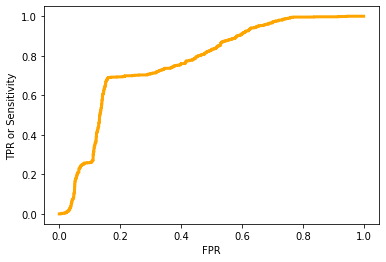

In [ ]:
# roc curve 
fpr, tpr, _= roc_curve(y_val, probs)
plt.plot(fpr, tpr, color = 'orange', lw = 3)
plt.xlabel('FPR')
plt.ylabel('TPR or Sensitivity')

In [ ]:
# AUC: higher the better
roc_auc_score(y_val,probs)

0.7712807345160285

## Crossvalidation Classification

In [ ]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [ ]:
from sklearn.utils import shuffle
# crossvalidation 
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits= 10, random_state= 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split, scoring = 'f1')
print(scores)
print('Mean f1 Scores', scores.mean())

[0.33576642 0.36988848 0.33552015 0.36313364 0.3401487  0.3543379
 0.34920635 0.36164384 0.35150376 0.34456929]
Mean f1 Scores 0.35057185207391645


In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
scores

array([-0.4788876 , -0.48511167, -0.47116876, -0.4788876 , -0.46332134,
       -0.48166378, -0.48304589, -0.49396356, -0.53789714, -0.55756068])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 9, scoring = 'neg_root_mean_squared_error')
scores

array([-0.47995201, -0.47932666, -0.47492619, -0.47175787, -0.46664381,
       -0.48999596, -0.48568957, -0.54892671, -0.54892671])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 8, scoring = 'neg_root_mean_squared_error')
scores

array([-0.4788876 , -0.48055523, -0.47497368, -0.46647615, -0.48332184,
       -0.486621  , -0.53715299, -0.54174705])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 7, scoring = 'neg_root_mean_squared_error')
scores

array([-0.47866278, -0.47376334, -0.48060857, -0.46681774, -0.48687869,
       -0.52615974, -0.54447398])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 6, scoring = 'neg_root_mean_squared_error')
scores

array([-0.47874837, -0.47833043, -0.4698936 , -0.48166378, -0.49071377,
       -0.59778168])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 5, scoring = 'neg_root_mean_squared_error')
scores

array([-0.48166378, -0.47504386, -0.4729341 , -0.48853523, -0.62726748])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 4, scoring = 'neg_root_mean_squared_error')
scores

array([-0.4780516 , -0.47046077, -0.48387326, -0.61305265])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 3, scoring = 'neg_root_mean_squared_error')
scores

array([-0.47581509, -0.47539457, -0.58674428])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 2, scoring = 'neg_root_mean_squared_error')
scores

array([-0.47399015, -0.55609463])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print (scores * -1)
print('Mean RMSE', scores.mean()*-1)

[0.4788876  0.48511167 0.47116876 0.4788876  0.46332134 0.48166378
 0.48304589 0.49396356 0.53789714 0.55756068]
Mean RMSE 0.49315080329773175


## KNN Model

In [ ]:
# Importing KNN
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
# Train the model
model = KNeighborsClassifier(n_neighbors= 11)
model.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
# Train the model
model = KNeighborsClassifier(n_neighbors= 85)
model.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=85)

In [ ]:
# Prediction
y_pred = model.predict(x_val_std)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,2194,92
1,63,651


In [ ]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.9483333333333334
Recall 0.9117647058823529
Precision 0.8761776581426649
F1 Score 0.8936170212765958


## Crossvalidation KNN

In [ ]:
# Crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits = 10, random_state = 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split, scoring = 'f1')
print(scores)
print('Mean f1 Score = ', scores.mean())

[0.89361702 0.88336784 0.8981026  0.90083799 0.88965996 0.89640884
 0.90380623 0.90254237 0.897418   0.89779006]
Mean f1 Score =  0.896355090896549


### Decision Tree Model

In [ ]:
# importing decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state =0, max_depth= 4)
model.fit(x_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
# Export the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file= 'tree.dot', impurity = True, 
                filled = True, rounded = True, feature_names= x_train.columns[0:5], class_names = ['0', '1'])

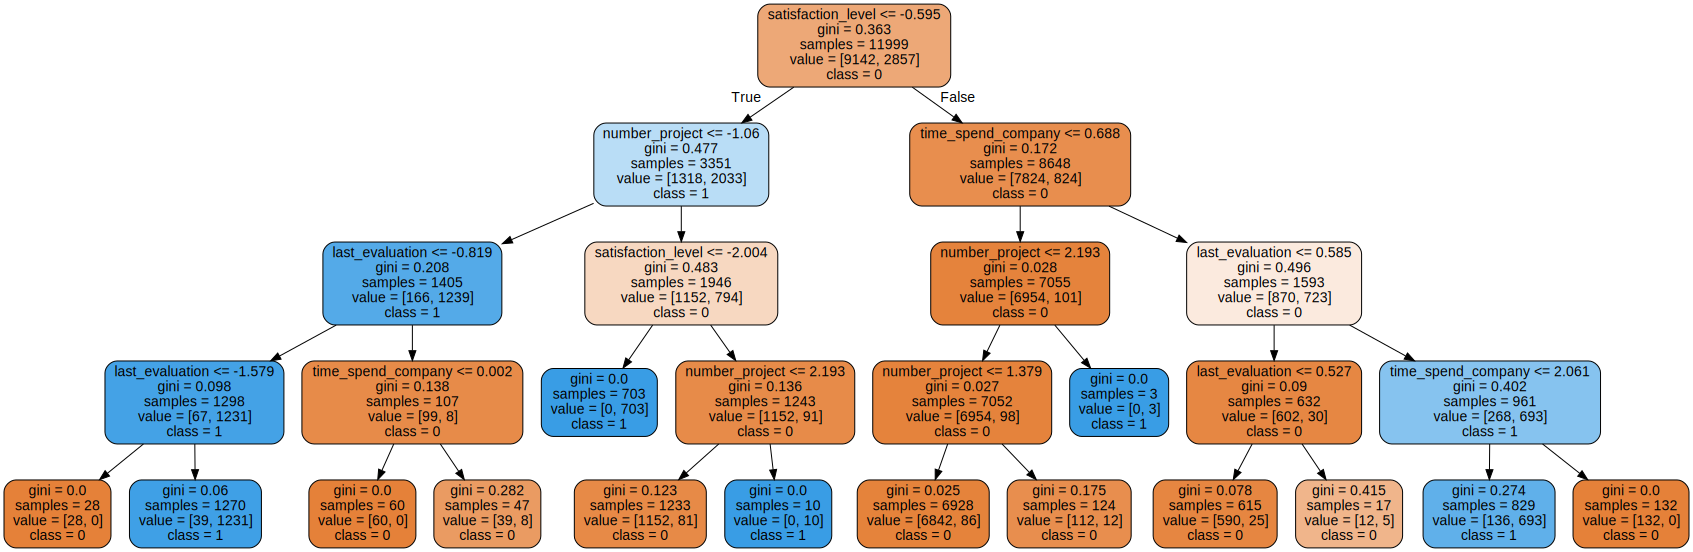

In [ ]:
# plot the tree
import  graphviz 
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# Prediction 
y_pred = model.predict(x_val_std)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,2239,47
1,55,659


In [ ]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.966
Recall 0.9229691876750701
Precision 0.93342776203966
F1 Score 0.928169014084507


## Crossvalidation Decision Tree model

In [ ]:
# Crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits = 10, random_state = 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split, scoring = 'f1')
print(scores)
print('Mean f1 Score = ', scores.mean())

[0.92816901 0.92610837 0.93098592 0.93033075 0.91929825 0.93036212
 0.92812282 0.93220339 0.92652204 0.92837079]
Mean f1 Score =  0.9280473458552871


## Random Forest

In [ ]:
# Import random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 1000, random_state=123, max_features=3)
model.fit(x_train , y_train)

RandomForestClassifier(max_features=3, n_estimators=1000, random_state=123)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,2239,47
1,55,659


In [ ]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.966
Recall 0.9229691876750701
Precision 0.93342776203966
F1 Score 0.928169014084507


In [ ]:
# Import random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 1000, random_state=123, max_features=4)
model.fit(x_train , y_train)

RandomForestClassifier(max_features=4, n_estimators=1000, random_state=123)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,2239,47
1,55,659


In [ ]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.966
Recall 0.9229691876750701
Precision 0.93342776203966
F1 Score 0.928169014084507


In [ ]:
# Import random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 1000, random_state=123, max_features=2)
model.fit(x_train , y_train)

RandomForestClassifier(max_features=2, n_estimators=1000, random_state=123)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,2239,47
1,55,659


In [ ]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.966
Recall 0.9229691876750701
Precision 0.93342776203966
F1 Score 0.928169014084507


Text(0.5, 0, 'Random Forest: Feature Importance')

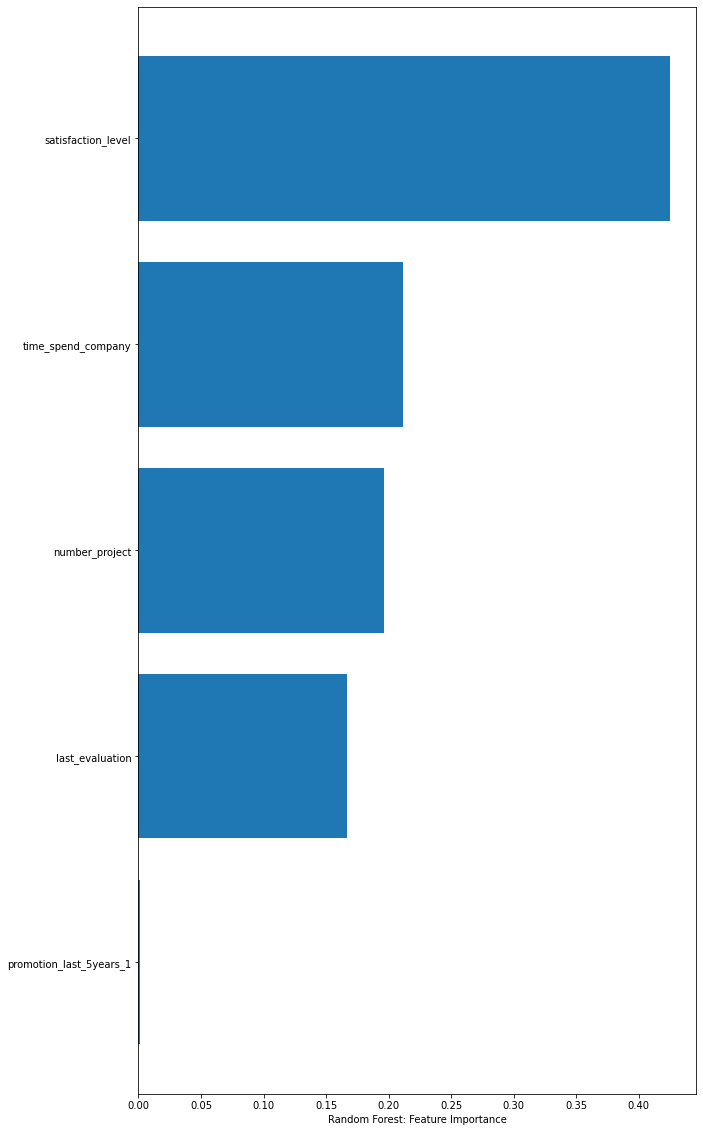

In [ ]:
from IPython.core.pylabtools import figsize
# variable importance score
plt.figure(figsize=(10,20))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[0:][sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest: Feature Importance")

## XG Boost

In [ ]:
# Import XG Boost
import xgboost as xgb

In [ ]:
# train the model
model = xgb.XGBClassifier(objective= 'binary:logistic',
                          random_state= 123,
                          learning_rate= 0.15,
                          n_estimators= 1000,
                          max_depth= 4)
model.fit(x_train, y_train)

XGBClassifier(learning_rate=0.15, max_depth=4, n_estimators=1000,
              random_state=123)

In [ ]:
# Prediction 
y_pred = model.predict(x_val)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,2265,21
1,26,688


In [ ]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.9843333333333333
Recall 0.9635854341736695
Precision 0.9703808180535967
F1 Score 0.966971187631764


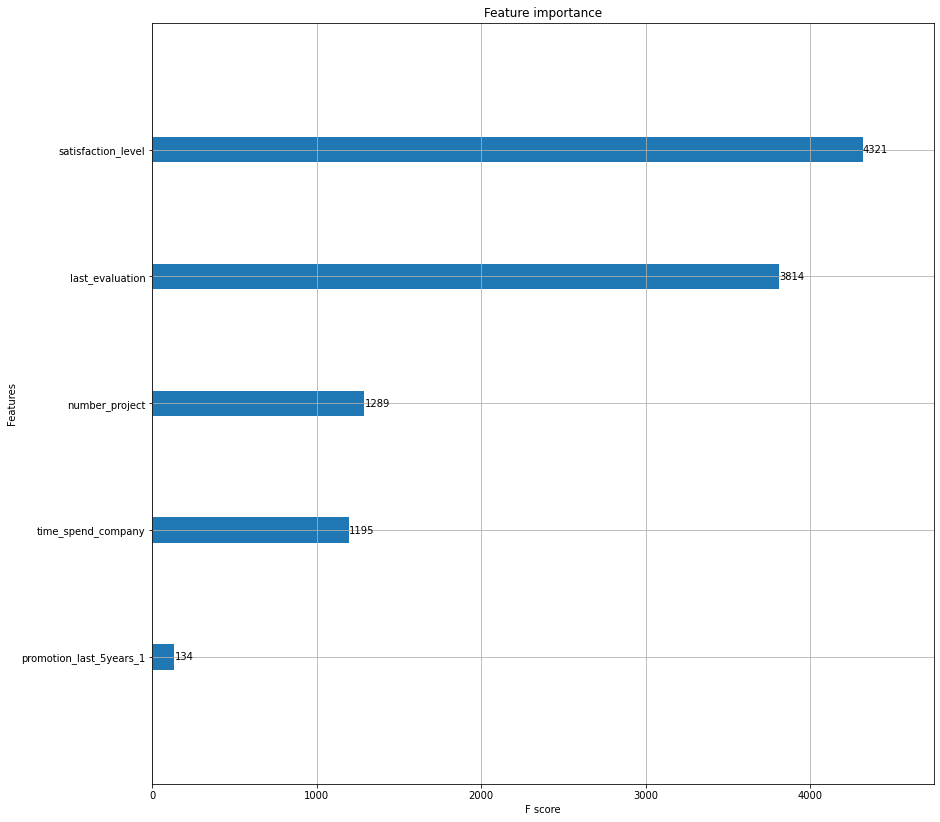

In [ ]:
# plotting feature importance
plt.rcParams["figure.figsize"] = (14,14)
xgb.plot_importance(model)

## Import Auto-SKlearn


In [ ]:
# importing auto-sklearn
import autosklearn
from autosklearn.classification import AutoSklearnClassifier

In [ ]:
# define the model
TIME_BUDGET = 60*2
model = AutoSklearnClassifier(
        time_left_for_this_task=TIME_BUDGET,
        metric = autosklearn.metrics.roc_auc,
        n_jobs = -1,
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds': 5}
)

In [ ]:
# train model
model.fit(x_train, y_train)

AutoSklearnClassifier(metric=roc_auc, n_jobs=-1, per_run_time_limit=24,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5},
                      time_left_for_this_task=120)

In [ ]:
# Prediction 
y_pred = model.predict(x_val)

In [115]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,2936,0
1,0,64


In [116]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 1.0
Recall 1.0
Precision 1.0
F1 Score 1.0


In [117]:
# Model Summary
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: bef8f1ba-1455-11ed-80c5-0242ac1c0002
  Metric: roc_auc
  Best validation score: 1.000000
  Number of target algorithm runs: 12
  Number of successful target algorithm runs: 2
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 1



In [118]:
# leaderboard summary
print(model.leaderboard())


          rank  ensemble_weight      type  cost   duration
model_id                                                  
4            1             0.46  adaboost   0.0  18.856123
11           2             0.54  adaboost   0.0   7.836178
